In [1]:
def indexer():
    import re
    import datetime
    target = re.compile(r"[^\w\s]|\s")
    return target.sub('',str(datetime.datetime.now()))
indexer()

'20230408101906275314'

# Linear Regression with Neural Nets
Simple regression is about predicting one continious variable from another.

$$
y_{i}=\beta_{0}+\beta_{1}x_{i}+\epsilon_{i}
$$

based on this, $\beta_{0}$ means the intercept, $\beta_{1}x_{i}$ being coefficient and independant variable ($x$) while $\epsilon_{i}$ is residual error.

In [4]:
import torch
import matplotlib.pyplot
import numpy
from IPython import display

In [41]:
matplotlib.pyplot.style.use('ggplot')

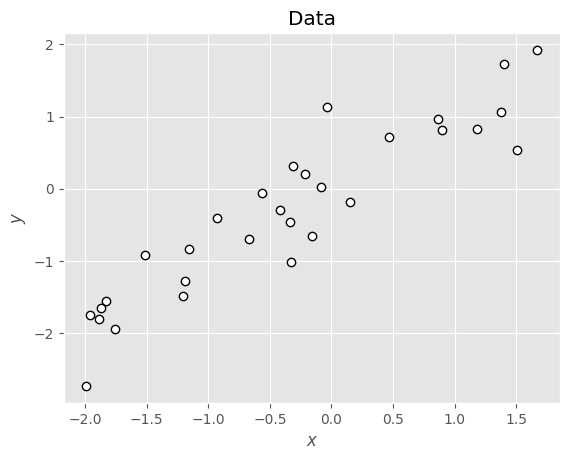

In [42]:
# generate data

N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

# plot data
matplotlib.pyplot.plot(x,y,'ko',markerfacecolor='white')
matplotlib.pyplot.xlabel('$x$')
matplotlib.pyplot.ylabel('$y$')
matplotlib.pyplot.title('Data')
matplotlib.pyplot.show()

In [43]:
# constructing model
nnReg = torch.nn.Sequential(
    torch.nn.Linear(1,1),
    torch.nn.ReLU(),
    torch.nn.Linear(1,1)
)
nnReg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [44]:
# learning rate
lr = .05


#loss function
lf = torch.nn.MSELoss()

#optimizer
optimizer = torch.optim.SGD(nnReg.parameters(),lr=lr)

In [45]:
epochs = 500
losses = torch.zeros(epochs)

for epochidx in range(epochs):
    # forward pass
    prediction = nnReg(x)
    
    # compute loss
    loss = lf(prediction,y)
    losses[epochidx] = loss
    
    
    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    

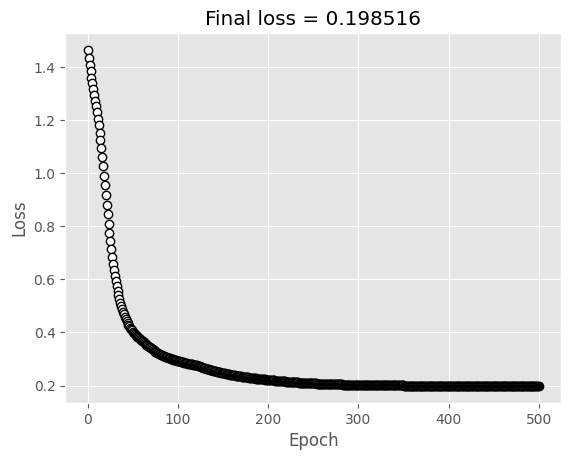

In [46]:
# final forward pass
predictions = nnReg(x)

# mse
testloss = (predictions-y).pow(2).mean()

matplotlib.pyplot.plot(losses.detach(),'ko',markerfacecolor='w',linewidth=.1)
matplotlib.pyplot.plot(epochs,testloss.detach(),'ko')
matplotlib.pyplot.xlabel('Epoch')
matplotlib.pyplot.ylabel('Loss')
matplotlib.pyplot.title('Final loss = %g'%testloss.item())
matplotlib.pyplot.show()

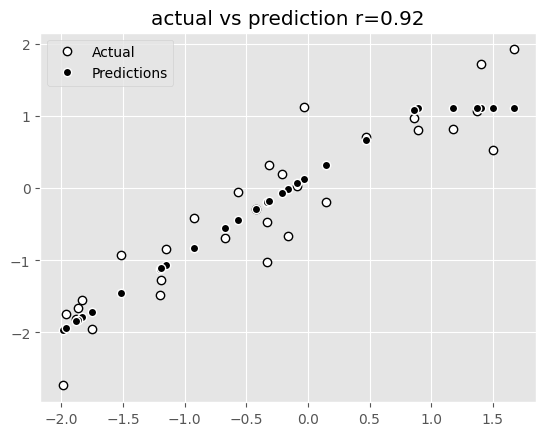

In [50]:
# plot the data
matplotlib.pyplot.plot(x,y,'ko',label='Actual',markerfacecolor='white')
matplotlib.pyplot.plot(x,predictions.detach(),'wo',label='Predictions',markerfacecolor='black')
matplotlib.pyplot.title(f'actual vs prediction r={numpy.corrcoef(y.T,predictions.detach().T)[0,1]:0.2f}')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()

In [68]:
def multiplexer(N,E=500):
    
    # initializing data
    N = 30
    x = torch.randn(N,1)
    y = x + torch.randn(N,1)/2
    
    # drafting a linear model
    nnReg = torch.nn.Sequential(
        torch.nn.Linear(1,1),
        torch.nn.ReLU(),
        torch.nn.Linear(1,1))
    
    # learning rate
    lr = .05


    #loss function
    lf = torch.nn.MSELoss()

    #optimizer
    optimizer = torch.optim.SGD(nnReg.parameters(),lr=lr)
    
    epochs = E
    losses = torch.zeros(epochs)

    for epochidx in range(epochs):
        # forward pass
        prediction = nnReg(x)

        # compute loss
        loss = lf(prediction,y)
        losses[epochidx] = loss


        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # final forward pass
    predictions = nnReg(x)

    # mse
    testloss = (predictions-y).pow(2).mean()

    fig,ax = matplotlib.pyplot.subplots(1,2,figsize=(14,3))
    ax[0].plot(losses.detach(),'ko',markerfacecolor='w',linewidth=.1)
    ax[0].plot(epochs,testloss.detach(),'ko')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Final loss = %g'%testloss.item())

    
    # plot the data
    ax[1].plot(x,y,'ko',label='Actual',markerfacecolor='white')
    ax[1].plot(x,predictions.detach(),'wo',label='Predictions',markerfacecolor='black')
    ax[1].set_title(f'actual vs prediction r={numpy.corrcoef(y.T,predictions.detach().T)[0,1]:0.2f}')
    matplotlib.pyplot.show()

    

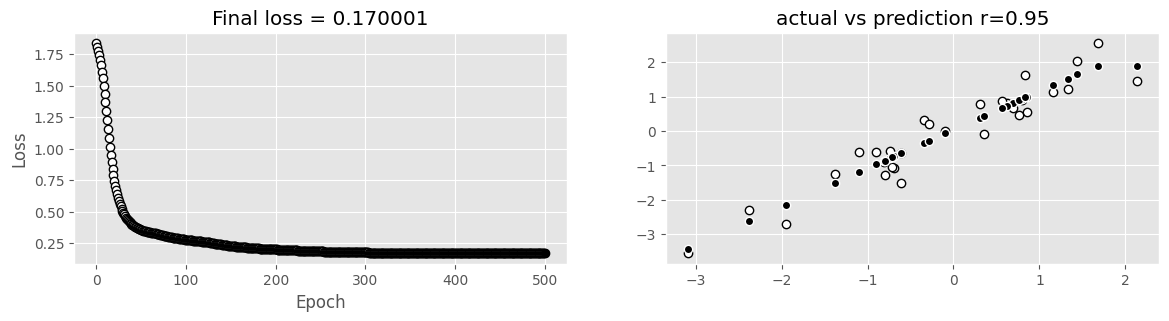

In [69]:
multiplexer(10)

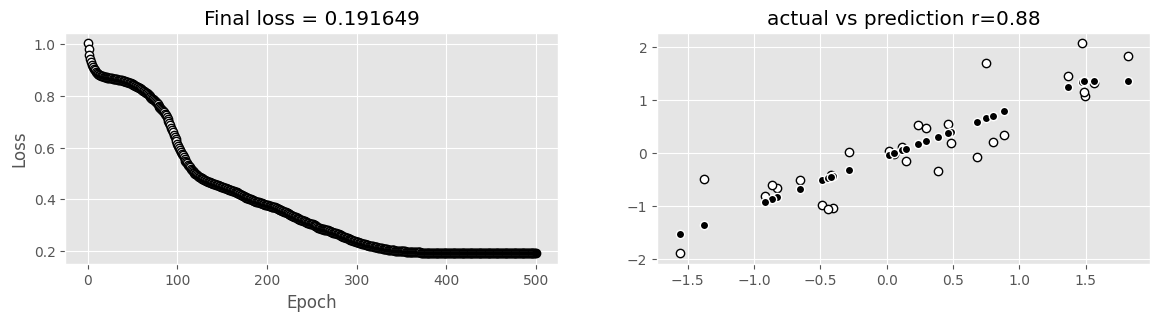

In [70]:
multiplexer(50)

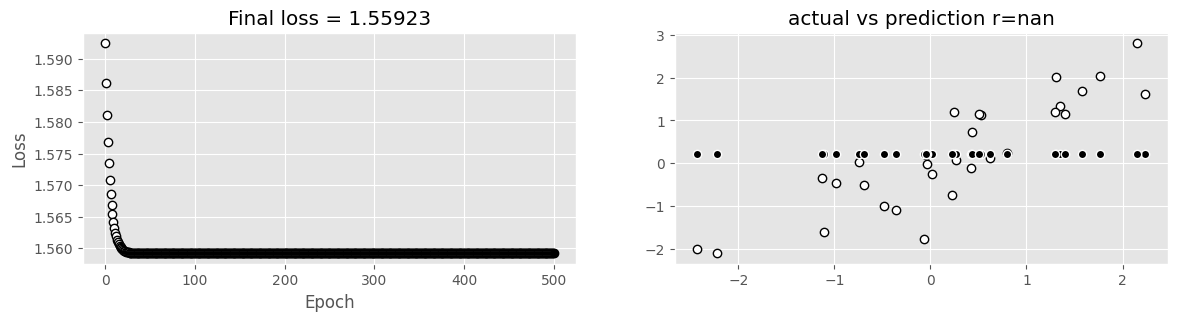

In [71]:
multiplexer(100)

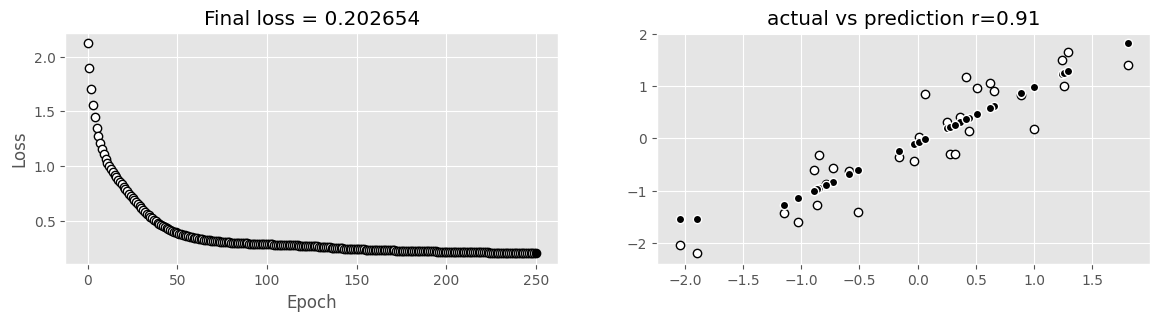

In [72]:
multiplexer(100,E=250)

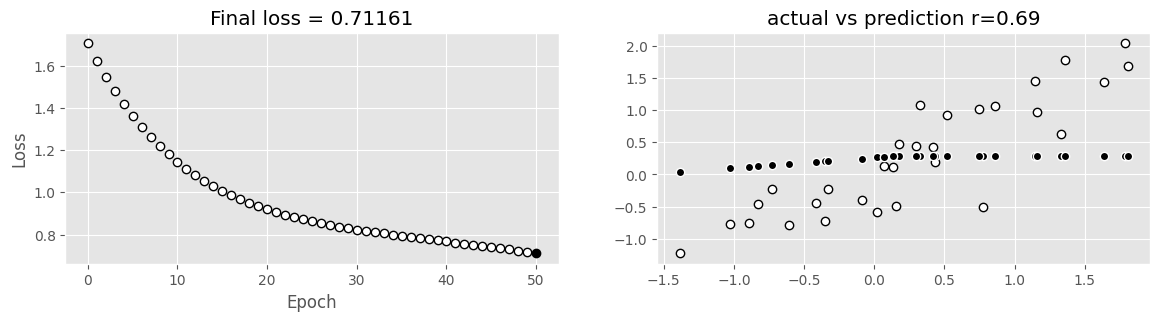

In [73]:
multiplexer(100,E=50)

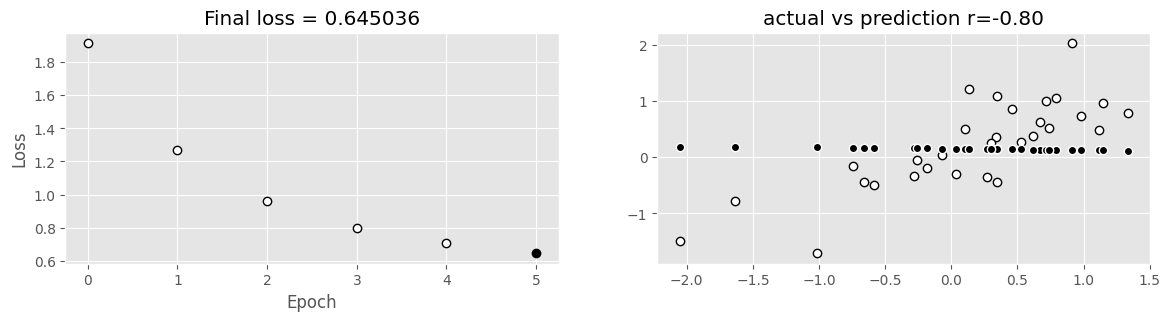

In [74]:
multiplexer(100,E=5)

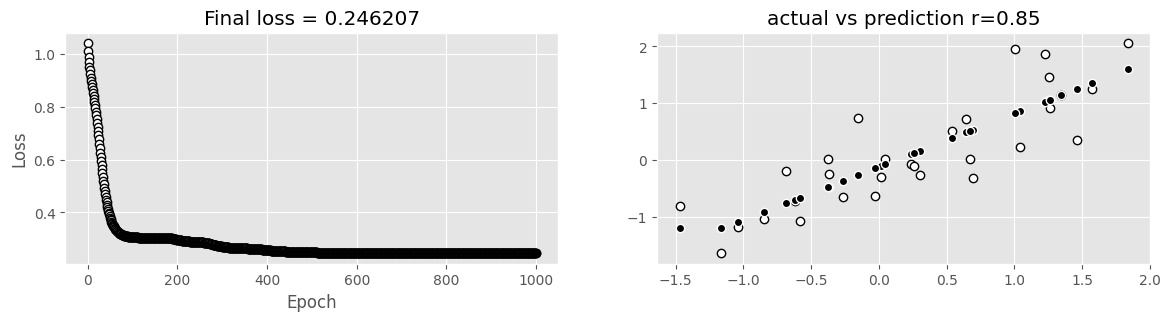

In [76]:
multiplexer(10,E=1000)

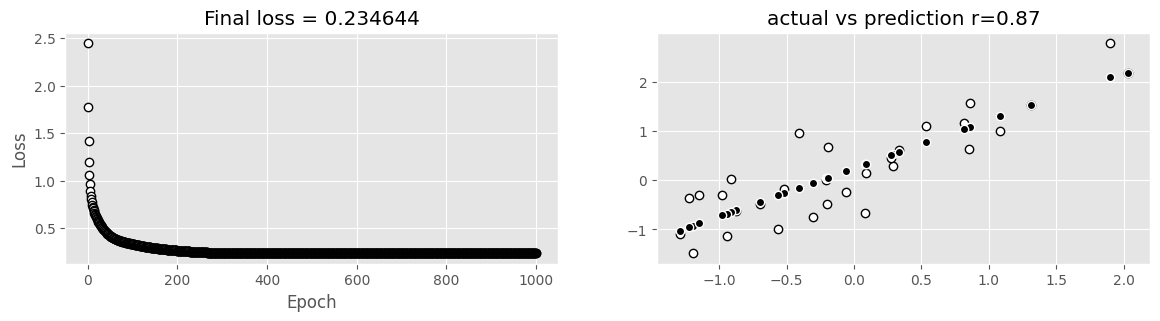

In [77]:
multiplexer(30,E=1000)

In [85]:
# reducing noise
def multiplexer(N,E=500,noise=2):
    
    # initializing data
    N = 30
    x = torch.randn(N,1)
    y = x + torch.randn(N,1)/noise
    
    # drafting a linear model
    nnReg = torch.nn.Sequential(
        torch.nn.Linear(1,1),
        torch.nn.ReLU(),
        torch.nn.Linear(1,1))
    
    # learning rate
    lr = .05


    #loss function
    lf = torch.nn.MSELoss()

    #optimizer
    optimizer = torch.optim.SGD(nnReg.parameters(),lr=lr)
    
    epochs = E
    losses = torch.zeros(epochs)

    for epochidx in range(epochs):
        # forward pass
        prediction = nnReg(x)

        # compute loss
        loss = lf(prediction,y)
        losses[epochidx] = loss


        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # final forward pass
    predictions = nnReg(x)

    # mse
    testloss = (predictions-y).pow(2).mean()

    fig,ax = matplotlib.pyplot.subplots(1,2,figsize=(14,3))
    ax[0].plot(losses.detach(),'ko',markerfacecolor='w',linewidth=.1)
    ax[0].plot(epochs,testloss.detach(),'ko')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Final loss = %g'%testloss.item())

    
    # plot the data
    ax[1].plot(x,y,'ko',label='Actual',markerfacecolor='white')
    ax[1].plot(x,predictions.detach(),'wo',label='Predictions',markerfacecolor='black')
    ax[1].set_title(f'actual vs prediction r={numpy.corrcoef(y.T,predictions.detach().T)[0,1]:0.2f}')
    matplotlib.pyplot.show()

    

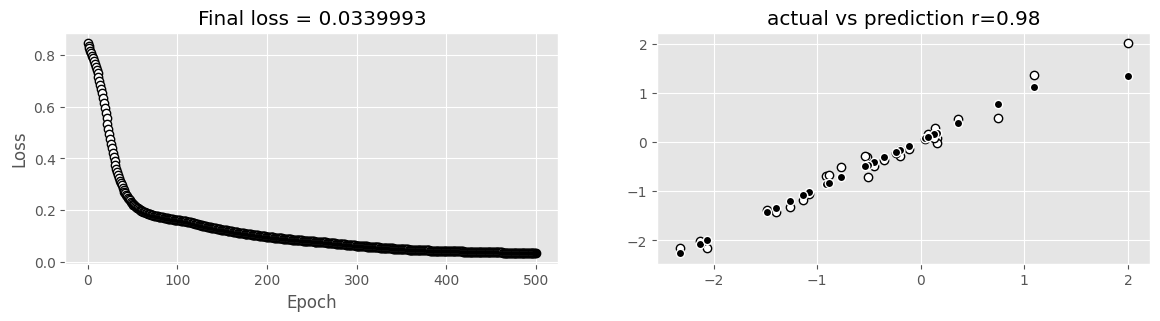

In [86]:
# reducing noise
multiplexer(30,noise=7)

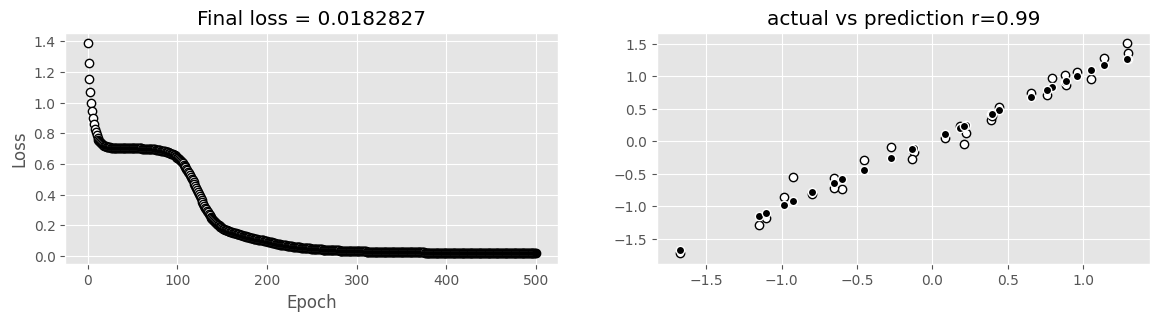

In [89]:
multiplexer(50,noise=7)

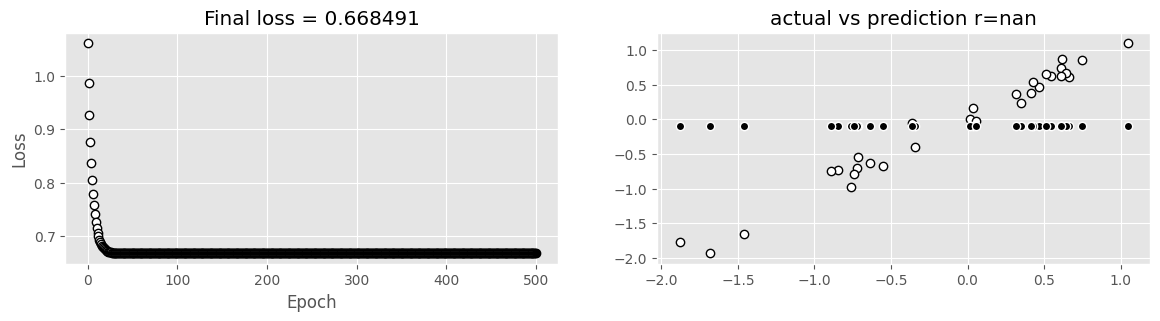

In [90]:
multiplexer(50000,noise=7)

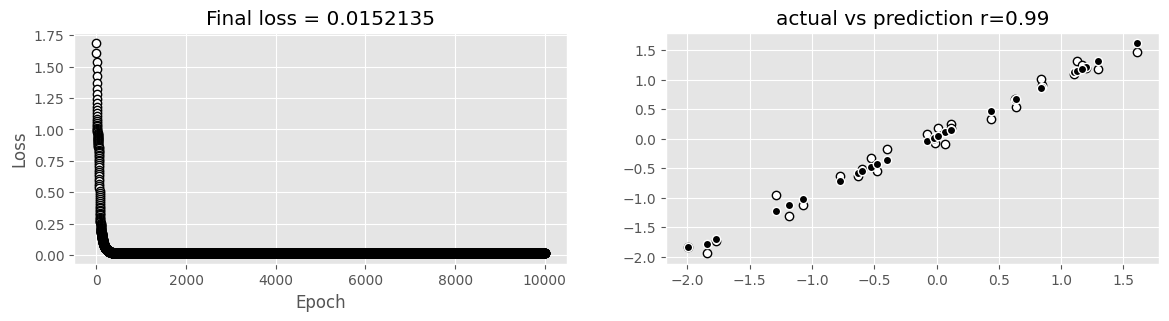

In [91]:
multiplexer(50000,E=10000,noise=7)

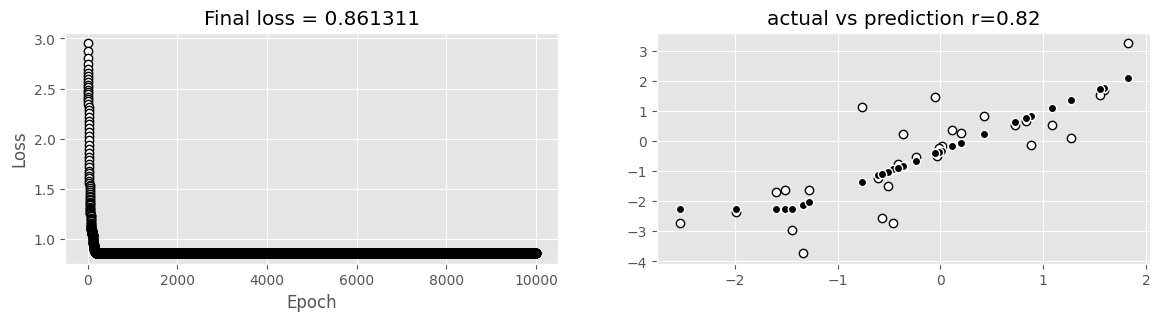

In [93]:
multiplexer(50000,E=10000,noise=1)